In [2]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [3]:
drug_data = pd.read_csv("drug.csv")

In [4]:
# Count how many missing values occurs
print("Number of missing values:\n", drug_data.isnull().sum())

Number of missing values:
 Age            0
Sex            0
BP             2
Cholesterol    2
Na_to_K        1
Drug           0
dtype: int64


In [5]:
# Features types
categorical_features = [i for i in drug_data.columns if drug_data[i].dtype == 'O' and i != 'Drug']
numerical_features = [i for i in drug_data.columns if drug_data[i].dtype != 'O']
print(f"The categorical features are:\n{categorical_features}\n\n")
print(f"The numerical features are:\n{numerical_features}")

The categorical features are:
['Sex', 'BP', 'Cholesterol']


The numerical features are:
['Age', 'Na_to_K']


In [6]:
# Handle empty cell by your own way
drug_data.dropna(inplace=True)
print(drug_data.isnull().sum())

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64


In [7]:
# The features and targets are separated
features = drug_data.drop(['Drug'], axis=1)
drug_target = drug_data['Drug']


In [8]:
# Encode categorical features
label_encoder = LabelEncoder()
for feature in categorical_features:
    features[feature] = label_encoder.fit_transform(features[feature])

In [9]:
# Encode categorical Target
drug_target = label_encoder.fit_transform(drug_target)

FIRST EXPERIMENT

In [10]:
sizes = []
accuracies = []
random_seeds = random.sample(range(100), 5)

for i in range(5):
    X_train, X_test, y_train, y_test = train_test_split(features, drug_target, test_size=0.3, random_state=random_seeds[i])
    model = DecisionTreeClassifier(criterion="entropy", random_state=random_seeds[i])

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)

    tree_size = model.tree_.node_count
    sizes.append(tree_size)
    accuracies.append(accuracy)

In [11]:
for i in range(5):
    print(f"\nExperiment {i + 1}:")
    print(f"Decision Tree nodes: {sizes[i]}")
    print(f"Accuracy: {accuracies[i]}\n")


Experiment 1:
Decision Tree nodes: 11
Accuracy: 0.9830508474576272


Experiment 2:
Decision Tree nodes: 11
Accuracy: 1.0


Experiment 3:
Decision Tree nodes: 11
Accuracy: 0.9830508474576272


Experiment 4:
Decision Tree nodes: 11
Accuracy: 1.0


Experiment 5:
Decision Tree nodes: 11
Accuracy: 0.9830508474576272



In [12]:
best_model_index = accuracies.index(max(accuracies))
print(f"Best Model (Highest Accuracy)")
print(f"  Experiment: {best_model_index + 1}")
print(f"  Decision Tree Size: {sizes[best_model_index]}")
print(f"  Accuracy: {accuracies[best_model_index]}")


Best Model (Highest Accuracy)
  Experiment: 2
  Decision Tree Size: 11
  Accuracy: 1.0


SECOND EXPERIMRNT


In [13]:
report = {
    'Training Size': [],
    'Mean Accuracy': [],
    'Max Accuracy': [],
    'Min Accuracy': [],
    'Mean Tree Size': [],
    'Max Tree Size': [],
    'Min Tree Size': [],
}

In [14]:
def calculate_accuracy_statistics(accuracies):
    accuracy_statistics = []
    accuracy_statistics.append(np.mean(accuracies))
    accuracy_statistics.append(np.max(accuracies))
    accuracy_statistics.append(np.min(accuracies))
    return accuracy_statistics

In [15]:
def calculate_tree_size_statistics(tree_sizes):
    tree_sizes_statistics = []
    tree_sizes_statistics.append(np.mean(tree_sizes))
    tree_sizes_statistics.append(np.max(tree_sizes))
    tree_sizes_statistics.append(np.min(tree_sizes))
    return tree_sizes_statistics  

In [16]:
def store_accuracy_statistics(accuracy_statistics):
    report['Mean Accuracy'].append(accuracy_statistics[0])
    report['Max Accuracy'].append(accuracy_statistics[1])
    report['Min Accuracy'].append(accuracy_statistics[2])

In [17]:
def store_tree_size_statistics(tree_sizes_statistics):
    report['Mean Tree Size'].append(tree_sizes_statistics[0])
    report['Max Tree Size'].append(tree_sizes_statistics[1])
    report['Min Tree Size'].append(tree_sizes_statistics[2])

In [18]:
random_seeds = random.sample(range(100), 5)
split_ratios = np.arange(0.7, 0.2, -0.1)

for split_ratio in split_ratios:

    seed_accuracies = []
    seed_tree_sizes = []

    for i in range(5):
        X_train, X_test, y_train, y_test = train_test_split(features, drug_target, test_size=split_ratio, random_state=random_seeds[i])
        
        model = DecisionTreeClassifier(criterion="entropy", random_state=random_seeds[i])
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        seed_accuracies.append(accuracy)

        tree_size = model.tree_.node_count
        seed_tree_sizes.append(tree_size)


    train_set_size = np.round((1 - split_ratio) * 100, 1)
    report['Training Size'].append(train_set_size)

    accuracy_statistics = calculate_accuracy_statistics(seed_accuracies)
    tree_size_statistics = calculate_tree_size_statistics(seed_tree_sizes)

    store_accuracy_statistics(accuracy_statistics)
    store_tree_size_statistics(tree_size_statistics)



In [38]:
report = pd.DataFrame(report)
print("\t\t\t\tStatistics Report\n")
print(report)

				Statistics Report

   Training Size  Mean Accuracy  Max Accuracy  Min Accuracy  Mean Tree Size  \
0           30.0       0.928467      0.985401      0.854015            11.8   
1           40.0       0.984615      1.000000      0.974359            11.0   
2           50.0       0.989796      1.000000      0.969388            11.0   
3           60.0       0.997436      1.000000      0.987179            11.0   
4           70.0       0.996610      1.000000      0.983051            11.0   

   Max Tree Size  Min Tree Size  
0             13             11  
1             11             11  
2             11             11  
3             11             11  
4             11             11  


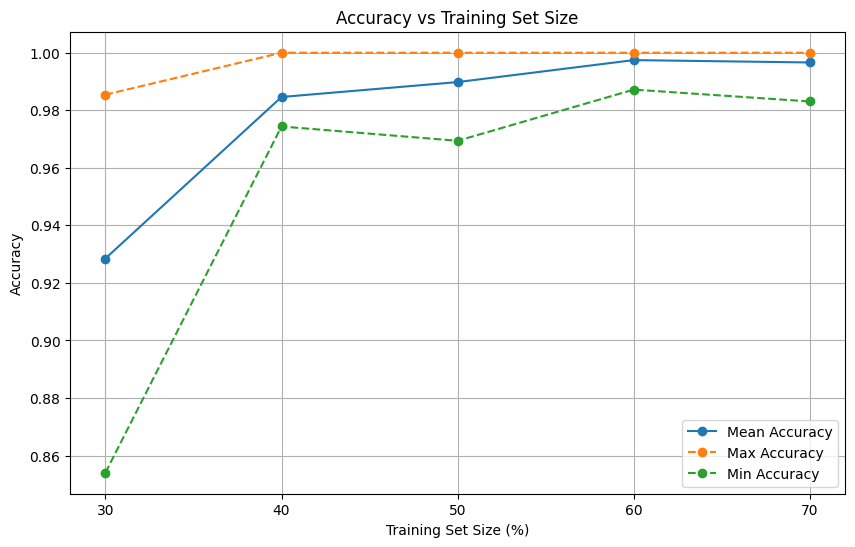

In [39]:
plt.figure(figsize=(10, 6))

plt.plot(report['Training Size'], report['Mean Accuracy'], marker='o', label='Mean Accuracy')
plt.plot(report['Training Size'], report['Max Accuracy'], marker='o', linestyle='--', label='Max Accuracy')
plt.plot(report['Training Size'], report['Min Accuracy'], marker='o', linestyle='--', label='Min Accuracy')

plt.title('Accuracy vs Training Set Size')
plt.xlabel('Training Set Size (%)')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.xticks(report['Training Size'])

plt.show()

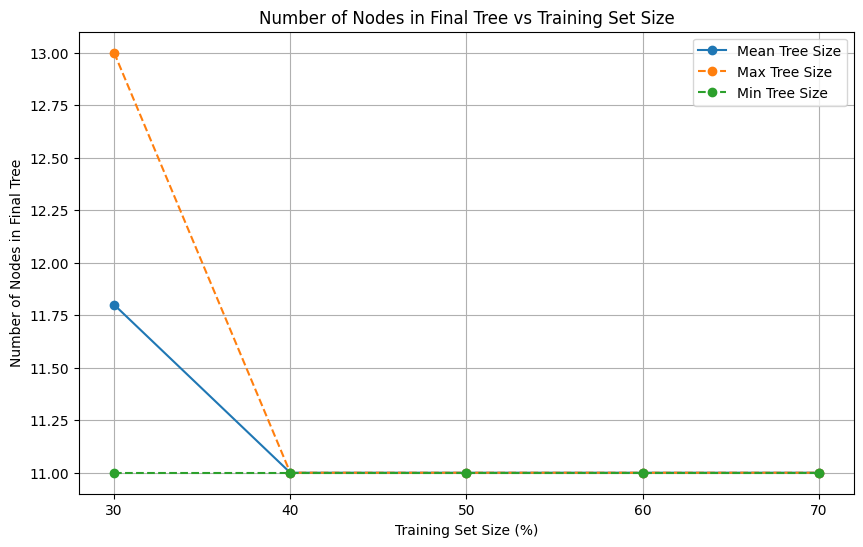

In [40]:
plt.figure(figsize=(10, 6))

plt.plot(report['Training Size'], report['Mean Tree Size'], marker='o', label='Mean Tree Size')
plt.plot(report['Training Size'], report['Max Tree Size'], marker='o', linestyle='--', label='Max Tree Size')
plt.plot(report['Training Size'], report['Min Tree Size'], marker='o', linestyle='--', label='Min Tree Size')

plt.title('Number of Nodes in Final Tree vs Training Set Size')
plt.xlabel('Training Set Size (%)')
plt.ylabel('Number of Nodes in Final Tree')
plt.legend()
plt.grid(True)

plt.xticks(report['Training Size'])

plt.show()